In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier

In [3]:
df = pd.read_csv(r'C:\Users\ABR\Desktop\Projet7_Bankrupt\data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ABR\\Desktop\\Projet7_Bankrupt\\data.csv'

In [ ]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [4]:
df.shape

NameError: name 'df' is not defined

In [ ]:
df["Bankrupt?"].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

We can see that our column Bankrupt? is unbalanced

# The KNN Algorithm

### Features Selection

In [ ]:
X = df.drop(['Bankrupt?'], axis=1)
y = df['Bankrupt?']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(6819, 95)
(6819,)


Find the optimal number of features with SFM

In [ ]:
# Find the optimal number of features with SFM
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

SFM = SelectFromModel(estimator=RandomForestClassifier())
s = SFM.fit(X, y)

n_features = s.transform(X).shape[1]
n_features

33

In [ ]:
# Get the features names 
feature_idx = s.get_support()
feature_name = X.columns[feature_idx]
feature_name

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax', ' Pre-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)',
       ' Interest-bearing debt interest rate', ' Net Value Per Share (B)',
       ' Net Value Per Share (A)', ' Net Value Per Share (C)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Net Value Growth Rate',
       ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %', ' Borrowing dependency',
       ' Net profit before tax/Paid-in capital', ' Average Collection Days',
       ' Fixed Assets Turnover Frequency', ' Working Capital to Total Assets',
       ' Cash/Total Assets', ' Cash/Current Liability',
       ' Inventory/Working Capital', ' Working Capital/Equity',
       ' Retained Earnings to Total Assets', ' Total income/Total expense',
 

In [ ]:
# split dataset with features
X = df[[' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax', ' Pre-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)',
       ' Interest-bearing debt interest rate', ' Net Value Per Share (B)',
       ' Net Value Per Share (A)', ' Net Value Per Share (C)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Net Value Growth Rate',
       ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %', ' Borrowing dependency',
       ' Net profit before tax/Paid-in capital', ' Average Collection Days',
       ' Fixed Assets Turnover Frequency', ' Working Capital to Total Assets',
       ' Cash/Total Assets', ' Cash/Current Liability',
       ' Inventory/Working Capital', ' Working Capital/Equity',
       ' Retained Earnings to Total Assets', ' Total income/Total expense',
       ' Net Income to Total Assets', ' Net Income to Stockholder\'s Equity',
       ' Liability to Equity', ' Degree of Financial Leverage (DFL)',
       ' Interest Coverage Ratio (Interest expense to EBIT)',
       ' Equity to Liability']]
y = df['Bankrupt?']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

------------- 1 -------------------
[[1934   46]
 [  58    8]]
------------- 2 -------------------
[[1968   12]
 [  62    4]]
------------- 3 -------------------
[[1965   15]
 [  61    5]]
------------- 4 -------------------
[[1978    2]
 [  64    2]]
------------- 5 -------------------
[[1973    7]
 [  60    6]]
------------- 6 -------------------
[[1977    3]
 [  64    2]]
------------- 7 -------------------
[[1971    9]
 [  62    4]]
------------- 8 -------------------
[[1974    6]
 [  64    2]]
------------- 9 -------------------
[[1971    9]
 [  63    3]]
------------- 10 -------------------
[[1976    4]
 [  64    2]]
------------- 11 -------------------
[[1971    9]
 [  64    2]]
------------- 12 -------------------
[[1974    6]
 [  64    2]]
------------- 13 -------------------
[[1972    8]
 [  63    3]]
------------- 14 -------------------
[[1977    3]
 [  64    2]]
------------- 15 -------------------
[[1975    5]
 [  63    3]]
------------- 16 -------------------
[[1977    3]

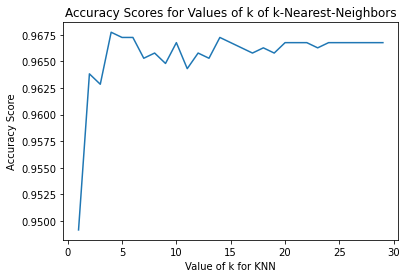

In [ ]:
k_range = list(range(1,30))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    print ('-------------', k, '-------------------')
    print(metrics.confusion_matrix(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [ ]:
scores

[0.9491691104594331,
 0.9638318670576735,
 0.9628543499511242,
 0.967741935483871,
 0.9672531769305963,
 0.9672531769305963,
 0.9652981427174976,
 0.9657869012707723,
 0.9648093841642229,
 0.9667644183773216,
 0.9643206256109482,
 0.9657869012707723,
 0.9652981427174976,
 0.9672531769305963,
 0.9667644183773216,
 0.966275659824047,
 0.9657869012707723,
 0.966275659824047,
 0.9657869012707723,
 0.9667644183773216,
 0.9667644183773216,
 0.9667644183773216,
 0.966275659824047,
 0.9667644183773216,
 0.9667644183773216,
 0.9667644183773216,
 0.9667644183773216,
 0.9667644183773216,
 0.9667644183773216]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
#print accuracy of model
print(metrics.accuracy_score(y_test,y_pred_knn))

0.9638318670576735


In [ ]:
#print precision value of model
print(metrics.precision_score(y_test,y_pred_knn))

0.25


In [ ]:
#print recall value of model
print(metrics.recall_score(y_test,y_pred_knn))

0.06060606060606061


In [ ]:
y_pred_knn=knn.predict(X_test)

In [ ]:
metrics.confusion_matrix(y_test, y_pred_knn)

array([[1968,   12],
       [  62,    4]], dtype=int64)


The classification report for KNeighborsClassifier is:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1980
           1       0.25      0.06      0.10        66

    accuracy                           0.96      2046
   macro avg       0.61      0.53      0.54      2046
weighted avg       0.95      0.96      0.95      2046



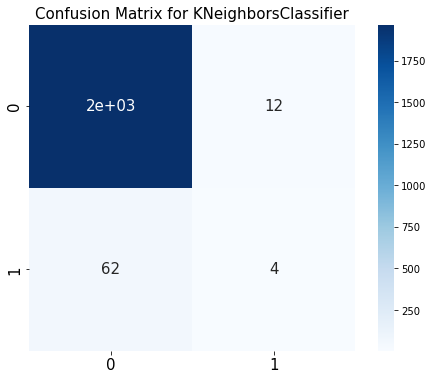

In [ ]:
generate_results(knn, y_pred_knn, 'KNeighborsClassifier')

In [ ]:
from sklearn.metrics import roc_auc_score

metrics.roc_auc_score(y_test, y_pred_knn)

0.5272727272727272

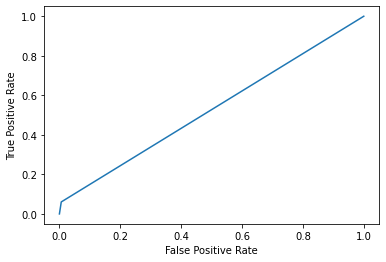

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_knn)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

# PassiveAggressiveClassifier

This model is used when you have massive data. but we can also use it for small amount of data.
L'algorithme Passive Aggressive (PA) est parfait pour classifier des flux massifs de données (par exemple Twitter). 
Il est facile à mettre en œuvre et très rapide.

In [ ]:
pac = PassiveAggressiveClassifier(max_iter=1000, random_state=0, class_weight="balanced")
pac.fit(X_train, y_train)
#hyperparameter
#class_weight="balanced"

PassiveAggressiveClassifier(class_weight='balanced', random_state=0)

In [ ]:
print(pac.predict(X_test))

[0 0 0 ... 1 0 0]


In [ ]:
y_pred_pac=pac.predict(X_test)

In [ ]:
#print accuracy of model
print(metrics.accuracy_score(y_test,y_pred_pac))

0.6749755620723362


In [ ]:
#print precision value of model
print(metrics.precision_score(y_test,y_pred_pac))

0.08575380359612725


In [ ]:
#print recall value of model
print(metrics.recall_score(y_test,y_pred_pac))

0.9393939393939394


In [ ]:
metrics.confusion_matrix(y_test, y_pred_pac)

array([[1319,  661],
       [   4,   62]], dtype=int64)


The classification report for PassiveAggressiveClassifier is:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80      1980
           1       0.09      0.94      0.16        66

    accuracy                           0.67      2046
   macro avg       0.54      0.80      0.48      2046
weighted avg       0.97      0.67      0.78      2046



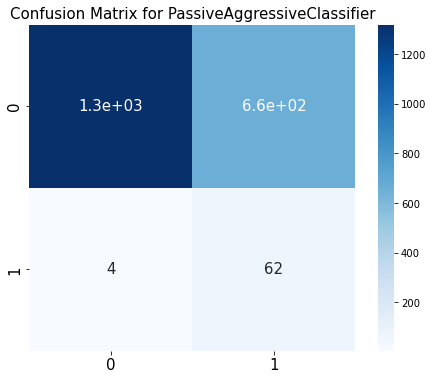

In [ ]:
generate_results(clf, y_pred_pac, 'PassiveAggressiveClassifier')

In [ ]:
from sklearn.metrics import roc_auc_score

metrics.roc_auc_score(y_test, y_pred_pac)


0.8027777777777778

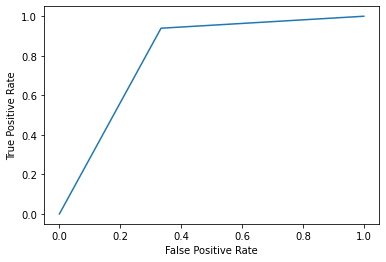

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_pac)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

# ComplementNB

In [ ]:
from sklearn.naive_bayes import ComplementNB

In [ ]:
cnb = ComplementNB()
cnb.fit(X_train, y_train)
#hyperparameter
#alpha="1"
#alpha="0.5"
#alpha="30"
#it doesn't change anything toour accuracy


ComplementNB()

In [ ]:
print(cnb.predict(X_test))


[0 0 0 ... 0 0 0]


In [ ]:
y_pred_cnb = cnb.predict(X_test)

In [ ]:
metrics.confusion_matrix(y_test, y_pred_cnb)

array([[1968,   12],
       [  61,    5]], dtype=int64)


The classification report for ComplementNB is:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1980
           1       0.29      0.08      0.12        66

    accuracy                           0.96      2046
   macro avg       0.63      0.53      0.55      2046
weighted avg       0.95      0.96      0.95      2046



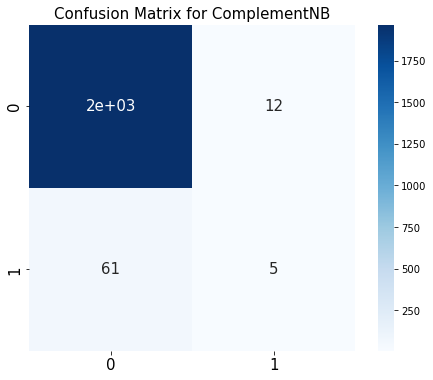

In [ ]:
generate_results(cnb, y_pred_cnb, 'ComplementNB')

In [ ]:
#print accuracy of model
print(metrics.accuracy_score(y_test, y_pred_cnb))

0.9643206256109482


In [ ]:
#print precision value of model
print(metrics.precision_score(y_test, y_pred_cnb))

0.29411764705882354


In [ ]:
#print recall value of model
print(metrics.recall_score(y_test, y_pred_cnb))

0.07575757575757576


In [ ]:
from sklearn.metrics import roc_auc_score

metrics.roc_auc_score(y_test, y_pred_cnb)

0.5348484848484848

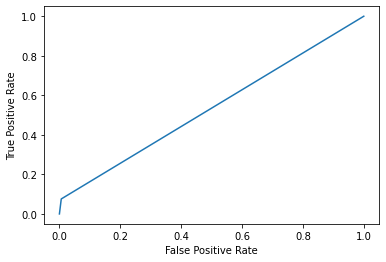

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_cnb)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

In [ ]:
# this model is not good it's not capable to recognize the 2 class

# SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
trainX = scaler.transform(X_train)
testX = scaler.transform(X_test)

In [ ]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

SGDClassifier()

In [ ]:
y_pred_sgd = sgd.predict(X_test)
cm = confusion_matrix(y_test, y_pred_sgd)
print(cm)

[[1980    0]
 [  66    0]]


c:\Users\ABR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ABR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ABR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



The classification report for SGDClassifier is:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1980
           1       0.00      0.00      0.00        66

    accuracy                           0.97      2046
   macro avg       0.48      0.50      0.49      2046
weighted avg       0.94      0.97      0.95      2046



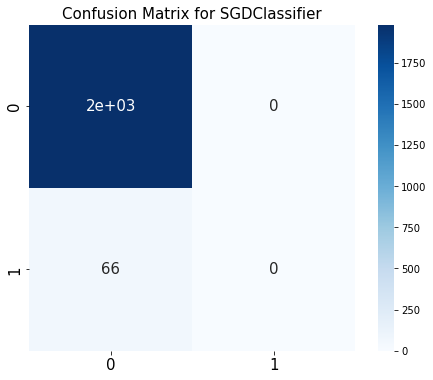

In [ ]:
generate_results(sgd, y_pred_sgd, 'SGDClassifier')

In [ ]:
y_pred_sgd = sgd.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred_sgd)))

Accuracy: 0.97


In [ ]:
#print accuracy of model
print(metrics.accuracy_score(y_test, y_pred_sgd))

0.967741935483871


In [ ]:
#print precision value of model
print(metrics.precision_score(y_test, y_pred_sgd))

0.0


c:\Users\ABR\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import roc_auc_score

metrics.roc_auc_score(y_test, y_pred)

0.5

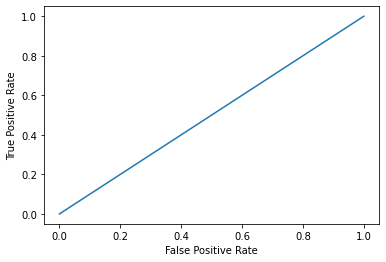

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_sgd)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

# LinearSVC

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svc = LinearSVC()
svc.fit(X_train, y_train)

c:\Users\ABR\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
print(svc.predict(X_test))

[0 0 0 ... 0 0 0]


In [ ]:
y_pred_svc=svc.predict(X_test)

In [ ]:
#print accuracy of model
print(metrics.accuracy_score(y_test,y_pred_svc))

0.9667644183773216


In [ ]:
#print precision value of model
print(metrics.precision_score(y_test,y_pred_svc))

0.4583333333333333


In [ ]:
#print recall value of model
print(metrics.recall_score(y_test,y_pred_svc))

0.16666666666666666


In [ ]:
metrics.confusion_matrix(y_test, y_pred_svc)

array([[1967,   13],
       [  55,   11]], dtype=int64)


The classification report for LinearSVC is:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1980
           1       0.46      0.17      0.24        66

    accuracy                           0.97      2046
   macro avg       0.72      0.58      0.61      2046
weighted avg       0.96      0.97      0.96      2046



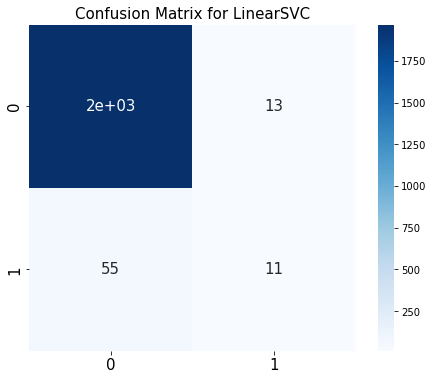

In [ ]:
generate_results(svc, y_pred_svc, 'LinearSVC')

In [ ]:
from sklearn.metrics import roc_auc_score

metrics.roc_auc_score(y_test, y_pred_svc)

0.580050505050505

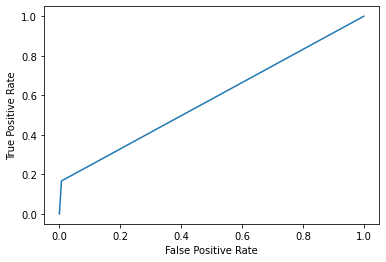

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_svc)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

# TPOT

In [ ]:
# check tpot version
import tpot
print('tpot: %s' % tpot.__version__)

tpot: 0.11.7


c:\Users\ABR\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [ ]:
from tpot import TPOTClassifier

In [ ]:
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)

In [ ]:
pipeline_optimizer.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.971087183202169

Generation 2 - Current best internal CV score: 0.9710876222463696

Generation 3 - Current best internal CV score: 0.9710878417684701

Generation 4 - Current best internal CV score: 0.9710885003347712

Generation 5 - Current best internal CV score: 0.9712972658522396

Best pipeline: RandomForestClassifier(MLPClassifier(MLPClassifier(GaussianNB(input_matrix), alpha=0.0001, learning_rate_init=0.001), alpha=0.1, learning_rate_init=0.1), bootstrap=True, criterion=entropy, max_features=0.3, min_samples_leaf=8, min_samples_split=14, n_estimators=100)


TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)

# RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
acc_rfc = rfc.score(X_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')


The accuracy of the Random Forest Classifier is: 97.11632453567938 %


In [ ]:
#print accuracy of model
print(metrics.accuracy_score(y_test, y_pred_rfc))

0.9711632453567938


In [ ]:
#print precision value of model
print(metrics.precision_score(y_test, y_pred_rfc))

0.7692307692307693


In [ ]:
#print recall value of model
print(metrics.recall_score(y_test,y_pred_rfc))

0.15151515151515152


In [ ]:
from sklearn.metrics import roc_auc_score

metrics.roc_auc_score(y_test, y_pred_rfc)

0.5750000000000001

In [ ]:
metrics.confusion_matrix(y_test, y_pred_rfc)

array([[1977,    3],
       [  56,   10]], dtype=int64)

In [ ]:
generate_results(rfc, y_pred_rfc, 'PassiveAggressiveClassifier')

NameError: name 'generate_results' is not defined

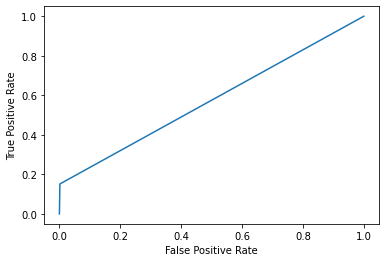

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_rfc)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()